In [2]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp


In [3]:
mp_df = pd.read_excel("../../data/moving_population/ingu_hour_mapo.xlsx",sheet_name=0)

In [4]:
ingu_var = [x for x in mp_df.columns if '_ingu' in x]

In [5]:
mp_df_2 = pd.melt(mp_df,['hour','gu_name','dong_name'],value_vars=ingu_var,var_name='성별연령대',value_name='인구')
mp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구
0,0,마포구,아현동,under10_ingu,0.930341
1,0,마포구,아현동,under10_ingu,0.439934
2,0,마포구,아현동,under10_ingu,1.186017
3,0,마포구,아현동,under10_ingu,0.040449
4,0,마포구,아현동,under10_ingu,1.422992


In [6]:
mp_df_2['연령대'] = mp_df_2['성별연령대'].str.slice(stop=7)
mp_df_2['성별'] = mp_df_2['성별연령대'].str.slice(start=8)
mp_df_2.head()

,hour,gu_name,dong_name,성별연령대,인구,연령대,성별
0,0,마포구,아현동,under10_ingu,0.930341,under10,ingu
1,0,마포구,아현동,under10_ingu,0.439934,under10,ingu
2,0,마포구,아현동,under10_ingu,1.186017,under10,ingu
3,0,마포구,아현동,under10_ingu,0.040449,under10,ingu
4,0,마포구,아현동,under10_ingu,1.422992,under10,ingu


In [7]:
mp_df_2_temp = mp_df_2[mp_df_2['성별']=='ingu'].groupby('연령대').sum()
mp_df_2_temp['남성'] = mp_df_2[mp_df_2['성별']=='male_ingu'].groupby('연령대').sum()['인구']
mp_df_2_temp['여성'] = mp_df_2[mp_df_2['성별']=='female_ingu'].groupby('연령대').sum()['인구']

In [8]:
mp_df_2_temp['남녀합'] = mp_df_2_temp.apply(lambda row:row['남성']+row['여성'],axis=1)
mp_df_2_temp.loc[:,['남성','여성','남녀합','인구']]

,남성,여성,남녀합,인구
연령대,,,,
under10,21150.163555,25420.854306,46571.017861,46571.017861
under20,164446.999346,182409.680518,346856.679864,346856.679864
under30,399642.226989,482564.410994,882206.637982,882206.637982
under40,471511.111013,455532.456175,927043.567189,927043.567189
under50,452703.165684,436499.256046,889202.421730,889202.421730
under60,346064.255209,347563.469004,693627.724213,693627.724213
under70,228068.059016,248618.542811,476686.601827,476686.601827
under80,117487.081238,135079.248804,252566.330041,252566.330041
upper80,33397.618981,41111.222892,74508.841873,356251.288817


In [9]:
mp_df_2_temp.rename(columns={'남성': 'male', '여성': 'female','남녀합':'sum','인구':'ingu'}, inplace=True)

In [10]:
mp_df_2['연령대'].unique()

array(['under10', 'under20', 'under30', 'under40', 'under50', 'under60',
       'under70', 'under80', 'upper80'], dtype=object)

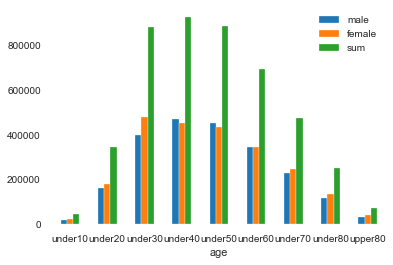

In [12]:
analysis_age = mp_df_2_temp.loc[:,['male','female','sum']]
analysis_age['age'] = mp_df_2['연령대'].unique()
ax = analysis_age.plot.bar(x='age', rot=0)
plt.savefig('analysis_age_mp.png')

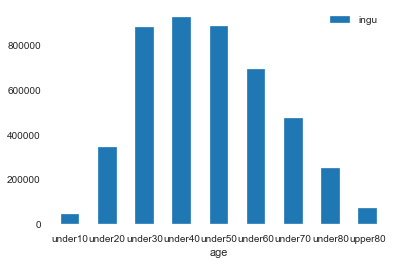

In [17]:
analysis_age.rename(columns={'sum':'ingu'},inplace=True)
ax3 = analysis_age.loc[:,['age','ingu']].plot.bar(x='age',y='ingu',rot=0)
plt.savefig('analysis_age_mp_total.png')

In [11]:
mp_df_2 = mp_df_2[mp_df_2['성별']!='ingu']
analysis_time = mp_df_2[mp_df_2['성별']=='male_ingu'].groupby('hour').sum()
analysis_time.rename(columns={'인구':'male'},inplace=True)

analysis_time['female'] = mp_df_2[mp_df_2['성별']=='female_ingu'].groupby('hour').sum()
analysis_time['sum'] = analysis_time.apply(lambda row:row['male']+row['female'],axis=1)
analysis_time

,male,female,sum
hour,,,
0,86656.824118,90183.903966,176840.728083
1,84987.109013,89264.517595,174251.626607
2,83824.045373,88690.380360,172514.425733
3,82889.797315,88117.542113,171007.339428
4,82179.730119,87523.564664,169703.294783
5,82982.473957,87421.513143,170403.987100
6,84496.595797,88043.438832,172540.034629
7,87360.664704,90678.165371,178038.830075
8,90590.865919,96026.846648,186617.712568


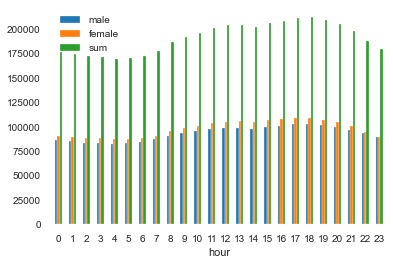

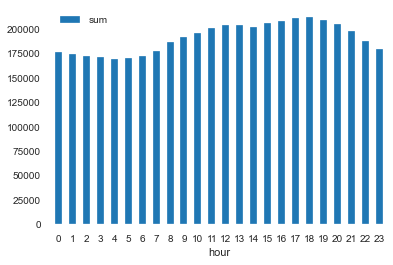

In [20]:
ax = analysis_time.plot.bar( rot=0)
plt.savefig('analysis_time_mp.png')
ax2 = analysis_time.loc[:,['sum']].plot.bar( rot=0)
plt.savefig('analysis_time_mp_total.png')

### 시간대별 연령대 누적 그래프 그리기

In [12]:
male_ingu_var =[x for x in ingu_var if 'male' in x]
female_ingu_var =[x for x in ingu_var if 'female' in x]
print(male_ingu_var)
print(female_ingu_var)

['under10_male_ingu', 'under20_male_ingu', 'under30_male_ingu', 'under40_male_ingu', 'under50_male_ingu', 'under60_male_ingu', 'under70_male_ingu', 'under80_male_ingu', 'upper80_male_ingu', 'under10_female_ingu', 'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu', 'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu', 'under80_female_ingu', 'upper80_female_ingu']
['under10_female_ingu', 'under20_female_ingu', 'under30_female_ingu', 'under40_female_ingu', 'under50_female_ingu', 'under60_female_ingu', 'under70_female_ingu', 'under80_female_ingu', 'upper80_female_ingu']


In [13]:
new_ingu_var = [x.split('_')[0] for x in ingu_var if len(x)<13]
mp_df_3 = mp_df.loc[:,['hour','gu_name','dong_name']]
mp_df_3_male = mp_df_3.copy()
mp_df_3_female = mp_df_3.copy()
for idx,_var in enumerate(new_ingu_var):
    mp_df_3[_var] = mp_df.apply(lambda row:row[male_ingu_var[idx]]+row[female_ingu_var[idx]],axis=1)
    mp_df_3_male[_var] = mp_df[male_ingu_var[idx]]
    mp_df_3_female[_var] = mp_df[female_ingu_var[idx]]
mp_df_3_female

,hour,gu_name,dong_name,under10,under20,under30,under40,under50,under60,under70,under80,upper80
0,0,마포구,아현동,0.564998,1.903639,2.923375,6.037999,4.820747,4.610593,2.838935,0.988412,0.334515
1,0,마포구,아현동,0.194389,0.937367,2.126201,3.282374,2.270988,2.072884,2.470374,0.789706,0.213145
2,0,마포구,아현동,0.610333,2.640932,4.626453,9.586080,6.959180,7.573941,4.303477,2.265397,0.587305
3,0,마포구,아현동,0.022664,0.466241,0.855782,1.313806,0.989963,1.003293,0.545880,0.265390,0.077489
4,0,마포구,아현동,0.842726,3.400646,4.968618,11.432560,7.189135,8.075150,3.850353,1.835608,0.549342
...,...,...,...,...,...,...,...,...,...,...,...,...
195297,23,마포구,상암동,0.431484,1.550629,0.817472,1.030094,2.333632,0.859522,0.627929,0.405256,0.184592
195298,23,마포구,상암동,0.008153,0.030641,0.352194,0.189990,0.131467,0.093452,0.105257,0.042356,0.015036
195299,23,마포구,상암동,0.000681,0.000681,0.002220,0.002901,0.003079,0.004100,0.000681,0.000000,0.000000
195300,23,마포구,상암동,0.004952,0.023341,0.024783,0.028472,0.047619,0.022991,0.025804,0.014376,0.003966


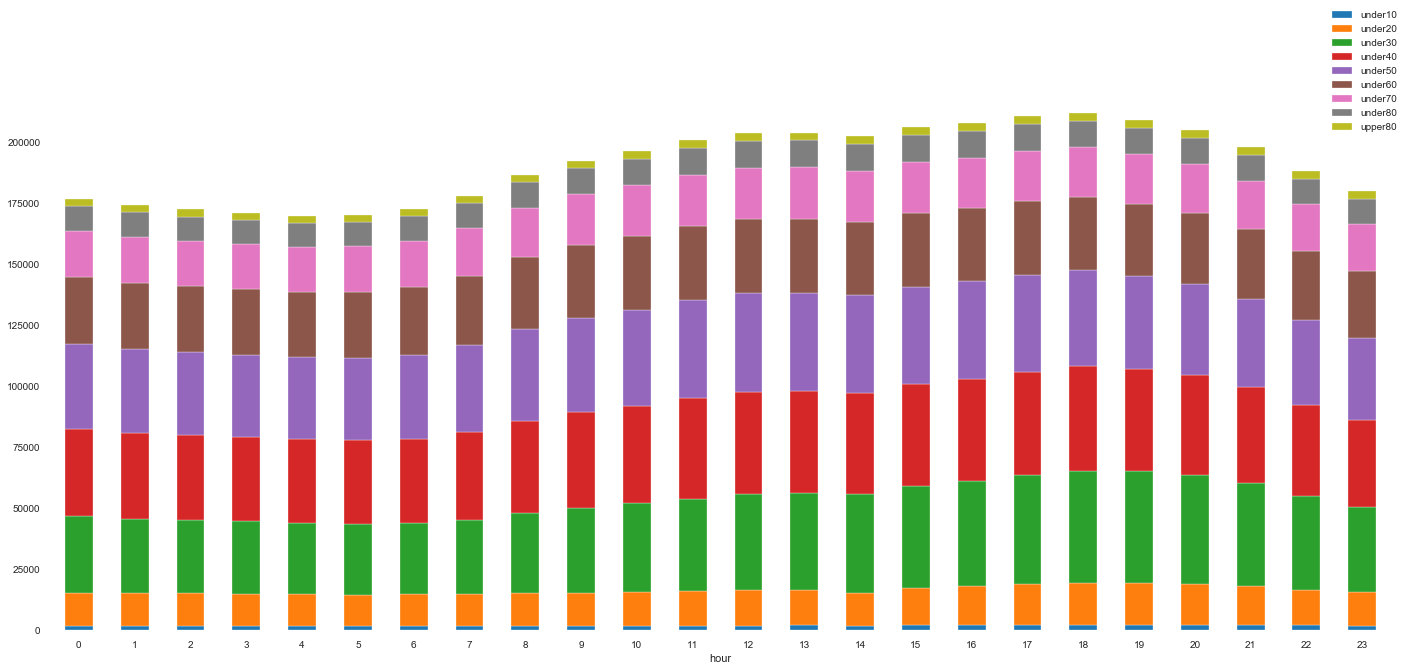

In [14]:
analysis_time_stack = mp_df_3.groupby('hour').sum()
analysis_time_stack2 = analysis_time_stack.copy()
analysis_time_stack2['hour'] = mp_df_3['hour'].unique()
ax4 = analysis_time_stack2.plot.bar(x='hour',rot=0,stacked=True,figsize=(24, 10))
ax4.legend(bbox_to_anchor=(0.95, 0.9)) 
# plt.savefig('analysis_time_mp_total_wrt_age2.png')

analysis_time_stack_male = mp_df_3_male.groupby('hour').sum()
analysis_time_stack_female = mp_df_3_female.groupby('hour').sum()

### 시간대별 연령대 인구수 히트맵 그리기

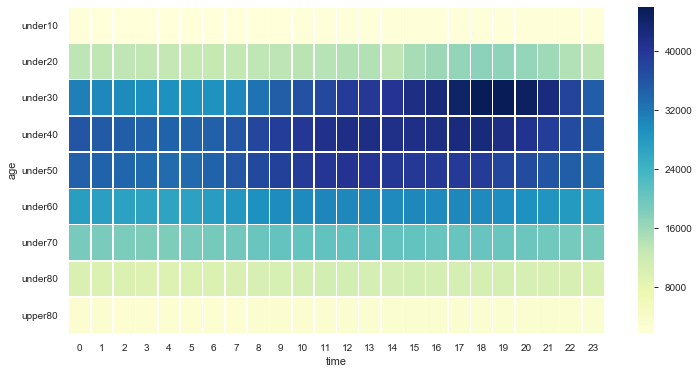

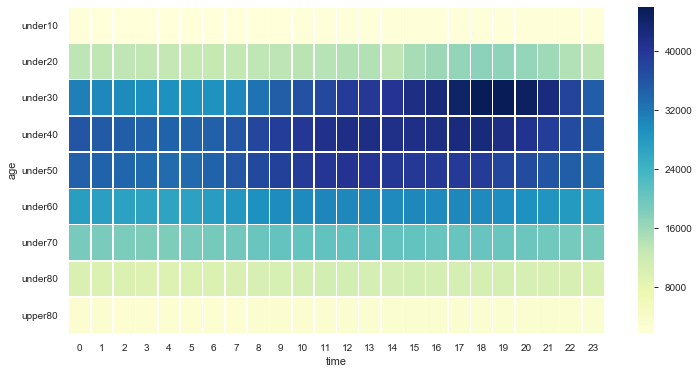

In [15]:
analysis_time_stack_heatmap = analysis_time_stack.transpose()
analysis_time_stack_heatmap
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_stack_heatmap,cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

# sns_fig.savefig('time_age_population_mp.png')


analysis_time_stack_heatmap = analysis_time_stack.transpose()
analysis_time_stack_heatmap_male = analysis_time_stack_male.transpose()
analysis_time_stack_heatmap_female = analysis_time_stack_female.transpose()
analysis_time_stack_heatmap
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_stack_heatmap,cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

# sns_fig.savefig('time_age_population_mp.png')

### 유출입 인구수 파악을 위해 거주지 인구수와의 차이를 가시화

In [16]:
analysis_time_heatmap_wrt3 = analysis_time_stack_heatmap.copy()
analysis_time_heatmap_male_wrt3 = analysis_time_stack_heatmap_male.copy()
analysis_time_heatmap_female_wrt3 = analysis_time_stack_heatmap_female.copy()
annot_male_percent = analysis_time_heatmap_wrt3.copy()

for idx in range(24):
    analysis_time_heatmap_wrt3[idx] = analysis_time_stack_heatmap[idx]-analysis_time_stack_heatmap[3]
    analysis_time_heatmap_male_wrt3[idx] = analysis_time_stack_heatmap_male[idx]-analysis_time_stack_heatmap_male[3]
    analysis_time_heatmap_female_wrt3[idx] = analysis_time_stack_heatmap_female[idx]-analysis_time_stack_heatmap_female[3]

    annot_male_percent[idx] = analysis_time_heatmap_male_wrt3[idx].abs()/(analysis_time_heatmap_male_wrt3[idx].abs()+analysis_time_heatmap_female_wrt3[idx].abs())
annot_male_percent[3] = analysis_time_stack_heatmap_male[3]/analysis_time_stack_heatmap[3]
annot_male_percent

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
under10,0.339753,0.357998,0.286715,0.459443,0.569978,0.538060,0.596517,0.996976,0.277302,0.330792,...,0.223584,0.304587,0.398973,0.433276,0.376200,0.422041,0.424311,0.428419,0.501751,0.536500
under20,0.569684,0.595647,0.710927,0.477450,0.391194,0.408497,0.410564,0.257897,0.740427,0.909189,...,0.152438,0.363303,0.388569,0.382999,0.377910,0.374152,0.372927,0.377387,0.465327,0.721135
under30,0.564663,0.556383,0.470428,0.467068,0.809211,0.677453,0.736830,0.007721,0.223588,0.320648,...,0.365473,0.370033,0.378075,0.388422,0.383496,0.406384,0.425669,0.444758,0.504308,0.622880
under40,0.701977,0.737707,0.632030,0.500965,0.543732,0.418823,0.899674,0.671434,0.491231,0.502659,...,0.527630,0.536198,0.547005,0.561453,0.579420,0.595476,0.638188,0.688294,0.819758,0.770682
under50,0.793737,0.796850,0.925002,0.497654,0.420098,0.170064,0.977098,0.745984,0.609420,0.589161,...,0.572889,0.593013,0.575505,0.598175,0.630935,0.663995,0.670206,0.696221,0.923481,0.537046
under60,0.660423,0.458174,0.943149,0.494389,0.852643,0.940446,0.861599,0.689584,0.538945,0.519132,...,0.493535,0.505153,0.535901,0.574671,0.616540,0.626233,0.627362,0.681990,0.692081,0.874993
under70,0.634706,0.645339,0.599668,0.472782,0.300689,0.789469,0.739249,0.578031,0.508957,0.539194,...,0.494316,0.498553,0.529426,0.589689,0.609196,0.591837,0.552581,0.655142,0.669585,0.787563
under80,0.590941,0.614175,0.557202,0.456244,0.278226,0.767122,0.991598,0.639246,0.563937,0.594456,...,0.520325,0.567482,0.627705,0.627378,0.612805,0.621076,0.588434,0.536618,0.587322,0.634009
upper80,0.462347,0.534220,0.488620,0.451990,0.112089,0.273045,0.048521,0.654821,0.476454,0.377947,...,0.313061,0.318223,0.372875,0.400822,0.439219,0.408250,0.414546,0.383916,0.366171,0.415507


### 성별 정보를 추가로 가시화하기 위한 작업
1. 남성 비율을 수치로 표현
2. 성비율에 따른 히트맵을 추가로 작성

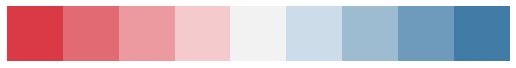

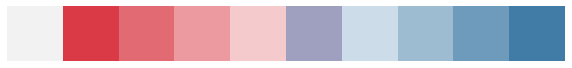

In [29]:
cmap0  = sns.diverging_palette(10, 240, sep=20, n=9)
sns.palplot(cmap0)

cmap  = sns.diverging_palette(10, 240, sep=20, n=9)
cmap = [np.array([0.95,0.95,0.95,1.])] + cmap 
cmap[5] = np.array([0.25,0.25,0.5,0.5])
sns.palplot(cmap)


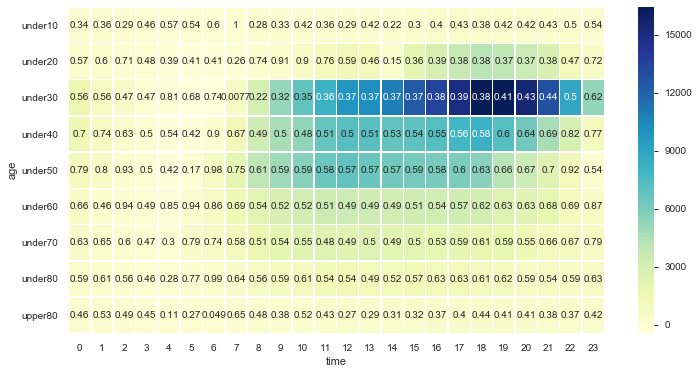

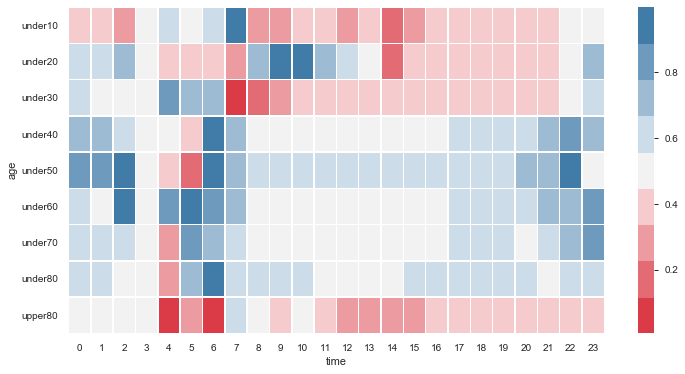

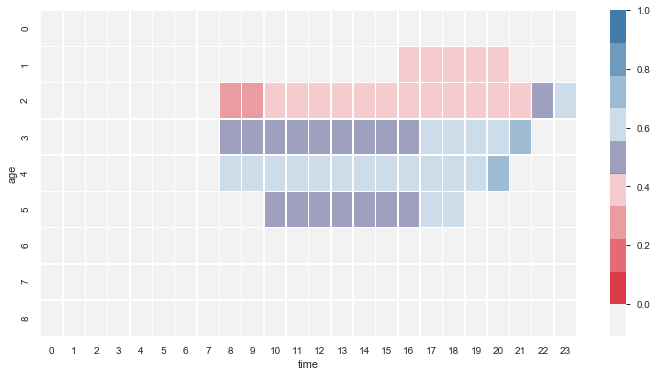

In [32]:
analysis_time_heatmap_wrt3.describe()
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(analysis_time_heatmap_wrt3,annot=annot_male_percent,
                     cmap="YlGnBu", linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_mp_wrt3_annot.png')

plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(annot_male_percent, cmap=cmap0,linewidths=.5)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_mp_wrt3_annot_sex.png')

annot_male_percent_select = np.where(analysis_time_heatmap_wrt3>3000,annot_male_percent,-0.11)
plt.figure(figsize=(12, 6))
snsplt = sns.heatmap(annot_male_percent_select,cmap=cmap, linewidths=.5,vmax=1.)
snsplt.set_xlabel("time")
snsplt.set_ylabel("age")
sns_fig = snsplt.get_figure()

sns_fig.savefig('time_age_population_mp_wrt3_annot_sex_select3000.png')